# 13wk-1: 마코프체인 (12)

최규빈  
2023-05-25

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-x4iyJGrSEk1pswE7dsNoke>

# imports

In [14]:
import numpy as np

# nature와 정상분포 (cont)

## 지난시간

`-` **정의** $\{X_t\}$가 HMC라고 하자. 아래의 식을 만족하는

$$\tilde{\boldsymbol \pi}^\top {\bf P} = \tilde{\boldsymbol \pi}^\top$$

$\tilde{\boldsymbol \pi}^\top$ 를 ***invariant measure*** 라고 한다.
만약에 $\tilde{\boldsymbol \pi}^\top$ 이 분포의 정의를 만족하면
***stationary measure*** 혹은 ***stationary distribution*** 이라고
부른다.

`-` 예시: “오른쪽으로만 갈래” 예제에서는

$$\tilde{\boldsymbol \pi}^\top = [1,1,1,\dots]$$

이 수식

$$\tilde{\boldsymbol \pi}^\top {\bf P} = \tilde{\boldsymbol \pi}^\top$$

을 만족한다. 따라서 이 예제에서
$\tilde{\boldsymbol \pi}^\top = [1,1,1,\dots]$ 은 ***invariant
measure*** 이다.

`-` $\{X_t\}$가 HMC라고 하자. 각각에 대하여 아래가 성립한다.

| IRR | nature | $\exists! \tilde{\boldsymbol \pi}$ up to multiplier | $\exists! {\boldsymbol \pi}$ | 에르고딕정리($\approx$LLN) |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
| $O$ |   PR   |                         $O$                         |             $O$              |            $O$             |
| $O$ |   NR   |                         $O$                         |             $X$              |            $X$             |
| $O$ |   TR   |                      $\Delta$                       |             $X$              |            $X$             |

`-` **이론**: $\{X_t\}$가 IRR-HMC[1] 라고 하자. $\{X_t\}$가 정상분포를
가진다는 조건과 유일한 정상분포를 가질 조건은 동치이다.

-   즉 $\{X_t\}$가 IRR-HMC 일때, 정상분포가 존재한다는 사실만 보이면
    자동으로 유일성이 보장된다.

`-` **Thm**: $\{X_t\}$가 IRR-HMC 라고 하자. 그러면 ***positvite
recurrent*** 와 $\exists! {\boldsymbol \pi}$ 은 동치조건이다. 즉

-   IRR-HMC $\{X_t\}$ 가 positive recurrent 하다면 항상 $\{X_t\}$ 는
    유일한 정상분포를 가진다.
-   IRR-HMC $\{X_t\}$ 가 정상분포를 가지면 (그 분포는 유일해지고)
    $\{X_t\}$는 항상 positive recurrent 하다.

## 이번시간

`-` **(정의) – 복습** $\{X_t\}$가 HMC라고 하자. 모든 $i \in E$ 는 아래의
조건중 하나를 만족하는데

1.  $\mathbb{P}_i(T_i <\infty)= 1$ and $\mathbb{E}_i[T_i]<\infty$,
2.  $\mathbb{P}_i(T_i <\infty)= 1$ and $\mathbb{E}_i[T_i]=\infty$,
3.  $\mathbb{P}_i(T_i <\infty)= 0$.

이중에서 3의 경우는 상태 $i$가 ***transient*** 하다고 표현하며, 1,2의
경우는 각각 ***potivite recurrent***, ***null recurrent*** 하다고
표현한다.

`-` 이걸 갑자기 복습하는 이유? 결국 TR, NR 모두 그 상태에 머물확률이
궁극적으로는 0이라는 느낌을 위해서! TR일 경우는 따질 필요 없이 확실하고
NR일 경우는 아래 식을 이용하여 판단할 수 있다.

$$\frac{1}{\mathbb{E}(T_i)} \approx \frac{1}{T}\sum_{t=1}^{T}\#\mathbb{1}(X_t=i)$$

1.  $T=100$ 일때 21번 상태 0에 있었음.
2.  평균적으로 $\frac{21}{100}\approx 1/5$ 비율로 상태 0에 있는듯
3.  현재 상태 0에 머물러 있다면, 평균 5번정도내로는 돌아올 듯 (그렇지
    않다면 2가 성립하지 않는걸?)

`-` 직관: 어떠한 상태가 PR이 아닌 경우는 그 상태에 머물 확률이 0이므로
당연히 정상분포를 가지지 않음.

`-` **Thm** (에르고딕 thm): IRR-HMC $\{X_t\}$가 PR 조건을 만족한다고
하자. 그러면 $\sum_{i\in E}|f(i)|\pi_i<\infty$를 만족하는 함수
$f:E \to \mathbb{R}$에 대하여 아래가 성립한다.

$$\lim_{T\to\infty} \frac{1}{T}\sum_{t=0}^{T-1}f(X_t) = \mathbb{E}_{\boldsymbol \pi}[f(X_0)]$$

여기에서 $\boldsymbol \pi$는
${\boldsymbol \pi}^\top = {\boldsymbol \pi}^\top{\bf P}$를 만족하는
**유일한** 정상분포이고 ${\bf P}$는 $\{X_t\}$의 transition matrix 이다.

> FINITE 한 경우와 비교1: FINITE 조건이 PR 조건으로 바뀐느낌.

> FINITE 한 경우와 비교2: $\sum_{i\in E}|f(i)|\pi_i<\infty$ 이라는
> 조건은 없었는데 생김

`-` **이론:** (에르고딕 thm, ver2) IRR-HMC $\{X_t\}$가 PR이면 아래가
성립한다는 의미이다.

$$\bar{\boldsymbol \pi} \to {\boldsymbol \pi}$$

(증명?)

이 이론이 성립하는 이유는 원래의 에르고딕 이론에서 $f$를 잘 해석하면
된다.

***SOME NOTES***

1.  IRR 조건은 까다롭지 않다. (없다면 그냥 가정할 수 있음)
2.  PR 조건이 있는 이유? NR 이거나 TR 이면 애초에 수렴할 정상분포가
    없는걸?

`-` **이론:** (에르고딕 thm, ver3) IRR-HMC $\{X_t\}$가 FINITE 이면
아래가 성립한다.

$$\bar{\boldsymbol \pi} \to {\boldsymbol \pi}$$

(증명?)

IRR-HMC가 FINITE 할 경우 PR이 임플라이 되므로 자동성립

> 에르고딕 정리는 결국 LLN의 upgrade 버전이며 (조건은 약화되었는데
> 결론도 강해요) “시간평균 $\approx$ 앙상블평균” 을 의미한다.

# periodicity

`-` **예제1** – 주기를 뭐라고 할 수 없어..

$\{X_t\}$를 아래와 같은 transition matrix를 가지는 HMC라고 하자.

[1] irreducible 한 homogeneous markov chain

In [3]:
P = np.array([[1.0, 0.0],
              [0.05,0.95]])
P

`-` 관찰1: 상태0으로 결국 가게 되어있다.

`-` 관찰2: 상태1에는 일시적으로 머문다. 상태0에는 반복적으로 방문한다.

-   상태1은 transient 하고, 상태 0은 recurrent 하다. (정확하게는
    positive recurrent)

`-` 주기??

-   상태0의 주기는 1이라고 할 수 있다.
-   상태1의 주기는? 무한대?

`-` 이 마코프체인은 AP인가?

-   질문이 틀림.
-   주기라는 개념은 recurrent state 인 경우에만 정의한다.

`-` **정의**: $\{X_t\}$가 상태공간 $E$에서 정의된 HMC 라고 하자.
상태공간 $E$의 원소중 recurrent state $i \in E$ 에 대하여 아래와 같은
집합 $I_i$ 를 생각하자.

$$I_i = \{t: p_{ii}^{(t)}>0,~t \geq 1 \}$$

그렇다면 상태 $i$의 주기는 $I_i$의 모든 원소들의 최대공약수로 정의한다.

`-` **이론**: $\{X_t\}$가 상태공간 $E$에서 정의된 HMC 라고 하자.
$\{X_t\}$가 IRR & recurrent 라고 가정하자. 그러면 모든 상태는 같은
주기를 가진다.

`-` **예제2**: 아래와 같은 전이확률을 고려하자.

In [4]:
P = np.array([0.0, 1.0, 0.0,
              0.0, 0.0, 1.0,
              1.0, 0.0, 0.0]).reshape(3,3)
P

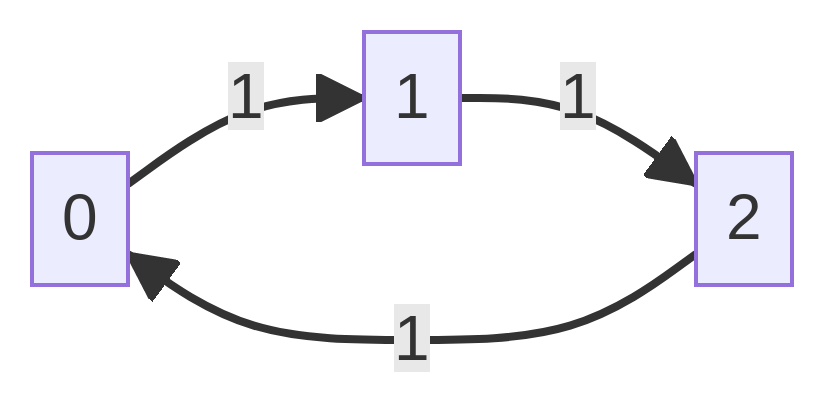

모든 상태 $i$에 대하여 주기를 구하라.

`-` **예제3**: 아래와 같은 전이확률을 고려하자.

In [5]:
P = np.array([0.0, 1.0, 0.0, 0.0,
              0.0, 0.0, 0.0, 1.0,
              0.0, 1.0, 0.0, 0.0,
              1/3, 0.0, 2/3, 0.0]).reshape(4,4)
P

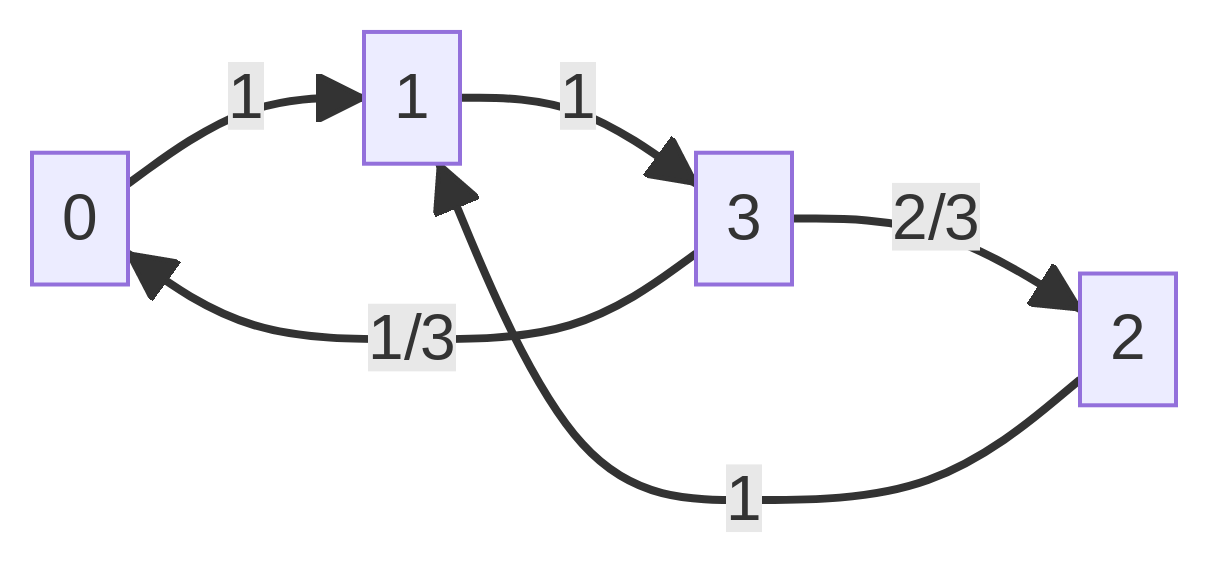

모든 상태 $i$에 대하여 주기를 구하라.

`-` **이론**: $\{X_t\}$가 IRR-TR-HMC[1]는 극한분포가 존재하지 않는다.

-   왜냐하면 ${\bf P}^{\star}={\bf 0}$ 이므로

`-` **이론**: $\{X_t\}$가 IRR-NR-HMC 역시 극한분포가 존재하지 않는다.

-   왜냐하면 ${\bf P}^{\star}={\bf 0}$ 이므로

`-` **이론**: $\{X_t\}$가 IRR-PR-HMC 의 경우 AP 조건을 만족하면 극한분포
${\bf p}_{\star}^\top$가 존재한다.

| IRR | nature |  periodicity   | ${\bf P}^\star$의 수렴 | $\exists!{\bf p}^\star$ |
|:---:|:------:|:--------------:|:----------------------:|:-----------------------:|
| $O$ |   TR   |   정의할수X    |          $O$           |           $X$           |
| $O$ |   NR   |     상관X      |          $O$           |           $X$           |
| $O$ |   PR   | AP 조건 충족 X |          $X$           |           $X$           |
| $O$ |   PR   | AP 조건 충족 O |          $O$           |           $O$           |

# 정리 (high-resolution)

`-` 우리가 결국에 보이고 싶은 정리는 아래의 형태이다.

$$\bar{\boldsymbol \pi} \to {\boldsymbol \pi} ={\bf p}^\star$$

`-` 이게 가능한 형태의 마코프체인을 에르고딕이라고 하며 그 조건은 IRR,
PR, AP 이다.

| IRR | nature |  periodicity   | $\bar{\boldsymbol \pi} \to {\boldsymbol \pi} = {\bf p}^\star$ |          안되는 이유          |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
| $O$ |   PR   |       AP       |                              $O$                              |              \-               |
| $O$ |   PR   | AP 조건 충족 X |                              $X$                              | ${\bf p}^\star$가 수렴안해서  |
| $O$ |   TR   |  정의할 수 X   |                              $X$                              | ${\boldsymbol \pi}$ 가 없어서 |
| $O$ |   NR   |     상관X      |                              $X$                              | ${\boldsymbol \pi}$ 가 없어서 |

# 정리 (low-resolution)

`-` 우리가 하고 싶었던 것: 어떠한 현상에 대하여, 확률공간
$(\Omega,{\cal F}, \mathbb{P})$ 에 대한 완전한 기술

`-` 이것을 수행하는 방법.

-   방법1: $(\Omega,{\cal F}, \mathbb{P})$를 state 하고 “관심있는 어떤
    것”을 이론적으로 구한다.
-   방법2: $\omega \to {\boldsymbol X}(\omega)={\boldsymbol x}$ 를
    무한번 반복 관찰하고 (=시뮬레이션하고!) “관심있는 어떤 것”을
    시뮬레이션으로 근사
-   방법3: 독립적으로 $n$회 관찰된
    $({\boldsymbol x}_1,{\boldsymbol x}_2,\dots,{\boldsymbol x}_n)$ 를
    이용하여 “관심있는 어떤 것”을 추정, 추정 결과를 합리적으로 설득.

`-` 우리가 이 섹션에서 하고 싶었던 것: 시간평균 $\approx$ 앙상블평균

1.  우리가 쓰는 전략은 방법3이다.
2.  방법3을 쓰기 위해서는 $n$회 관측된 샘플이 필요한데 우리는
    one-sample만 가지고 있으므로 one-sample을 쪼개어 $T$샘플을 만드는
    전략을 사용한다. (비판여지 있음)
3.  이때 우리가 관심있는 어떤 것은 “평균” 즉 “앙상블평균” 이다.
4.  우리가 관심있는 것을 추정하기 위해서 “시간평균”을 이용하였다.
5.  시간평균으로 앙상블평균을 근사한다는 논리를 합리적으로 설득하기
    위해서는 “독립적으로 시행”과 “동일한 분포” 가정이 있어야 한다.
    하지만 우리의 경우는 그렇지 않다. (비판여지 있음)

`-` “시간평균 $\approx$ 앙상블평균” 에 대한 이론적인 근거를 백업하기
위해서 필요한 것: 에르고딕 정리 (IRR,PR)

`-` 마코프체인의 특화트릭: “시간평균 $\approx$ 앙상블평균 =
${\bf P}^\star$의 원소값” 에 대한 이론적인 근거를 백업하기 위해서 필요한
것: 에르고딕 정리 (IRR,PR,AP)

[1] irreducible and transient homogeneous markov chain